In [1]:
import pandas as pd
import plotly.express as px  
import plotly.graph_objects as go
from jupyter_dash import JupyterDash
from dash import dcc, html, Input, Output 
from datetime import date
from sklearn.linear_model import LinearRegression
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from IPython.display import Image

In [2]:
owid_df = pd.read_csv("../../../data/stage_2/owid-covid-data.csv")

In [3]:
US_data=owid_df[owid_df['location']=='United States']

In [4]:
US_data[['total_cases','new_cases','new_deaths','total_deaths','new_cases_per_million','new_deaths_per_million']]=US_data[['total_cases','new_cases','new_deaths','total_deaths','new_cases_per_million','new_deaths_per_million']].fillna(0)

C:\Users\chand\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [5]:
US_data=US_data[['date','total_cases','new_cases','new_deaths','total_deaths','new_cases_per_million','new_deaths_per_million']]

In [6]:
US_data['log_cases']=np.log(US_data['new_cases'])
US_data['log_deaths']=np.log(US_data['new_deaths'])

C:\Users\chand\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [7]:
US_data=US_data[US_data['total_cases']>0]

In [8]:
US_data['date']=US_data['date'].astype('datetime64[ns]')


In [9]:
US_data

,date,total_cases,new_cases,new_deaths,total_deaths,new_cases_per_million,new_deaths_per_million,log_cases,log_deaths
119842,2020-01-22,1.0,0.0,0.0,0.0,0.000,0.000,-inf,-inf
119843,2020-01-23,1.0,0.0,0.0,0.0,0.000,0.000,-inf,-inf
119844,2020-01-24,2.0,1.0,0.0,0.0,0.003,0.000,0.000000,-inf
119845,2020-01-25,2.0,0.0,0.0,0.0,0.000,0.000,-inf,-inf
119846,2020-01-26,5.0,3.0,0.0,0.0,0.009,0.000,1.098612,-inf
...,...,...,...,...,...,...,...,...,...
120481,2021-10-22,45400466.0,99422.0,1820.0,735373.0,298.641,5.467,11.507129,7.506592
120482,2021-10-23,45427464.0,26998.0,427.0,735800.0,81.096,1.283,10.203518,6.056784
120483,2021-10-24,45444260.0,16796.0,141.0,735941.0,50.451,0.424,9.728896,4.948760
120484,2021-10-25,45547158.0,102898.0,1401.0,737342.0,309.082,4.208,11.541493,7.244942


In [10]:
l=[]
for i in range(0,len(US_data)):
    day=i+1
    l.append(day)
US_data['Number_days_Day1']=l

In [11]:
US_data

,date,total_cases,new_cases,new_deaths,total_deaths,new_cases_per_million,new_deaths_per_million,log_cases,log_deaths,Number_days_Day1
119842,2020-01-22,1.0,0.0,0.0,0.0,0.000,0.000,-inf,-inf,1
119843,2020-01-23,1.0,0.0,0.0,0.0,0.000,0.000,-inf,-inf,2
119844,2020-01-24,2.0,1.0,0.0,0.0,0.003,0.000,0.000000,-inf,3
119845,2020-01-25,2.0,0.0,0.0,0.0,0.000,0.000,-inf,-inf,4
119846,2020-01-26,5.0,3.0,0.0,0.0,0.009,0.000,1.098612,-inf,5
...,...,...,...,...,...,...,...,...,...,...
120481,2021-10-22,45400466.0,99422.0,1820.0,735373.0,298.641,5.467,11.507129,7.506592,640
120482,2021-10-23,45427464.0,26998.0,427.0,735800.0,81.096,1.283,10.203518,6.056784,641
120483,2021-10-24,45444260.0,16796.0,141.0,735941.0,50.451,0.424,9.728896,4.948760,642
120484,2021-10-25,45547158.0,102898.0,1401.0,737342.0,309.082,4.208,11.541493,7.244942,643


In [12]:
app = JupyterDash(__name__)
df=US_data

In [13]:
app.layout = html.Div([
    html.H1("Covid-19 trend lines with linear and log mode",style={'text-align':'center'}),
    dcc.DatePickerRange(
        id='my-date-picker-range',
        min_date_allowed=date(2020, 1, 22),
        max_date_allowed=date(2021, 12, 30),
        initial_visible_month=date(2020, 1, 22),
        end_date=date(2021, 10, 22)
    ),
    html.Br(),
    html.Div([
            html.Label("Cases Or Deaths:"),
            dcc.RadioItems(id="COrD",
                options=[
                    {"label": "Cases", "value": "cases"},
                    {"label": "Deaths", "value": "deaths"}
                ],
                value="cases", labelStyle={"display":"block"})]),
    html.Br(),
        html.Div([
            html.Label("Linear Or Log:"),
            dcc.RadioItems(id="LOrLog",
                options=[
                    {"label": "Linear", "value": "linear"},
                    {"label": "Log", "value": "log"}
                ],
                value="linear", labelStyle={"display":"block"})]),
    html.Br(),

    dcc.Graph(id='Trend_Plot')
])
@app.callback(
     Output(component_id='Trend_Plot',component_property='figure'),
     Input('my-date-picker-range','start_date'),
     Input('my-date-picker-range','end_date'),
     Input('COrD','value'),
     Input('LOrLog','value'))
def updated_graph(start_date, end_date,CorD_value,LorLog_value):
    if LorLog_value=='linear':
        if start_date is not None:
            df_1=df.copy()
            df_1=df_1[(df_1['date']>=start_date) & (df_1['date']<=end_date)]
            if CorD_value=='cases':
                fig_c= px.scatter(df_1, x ='date', y='new_cases', color='new_cases')
                fig_c.update_traces(mode='lines+markers')
                return fig_c
            elif CorD_value=='deaths':
                fig_d=px.scatter(df_1, x ='date', y='new_deaths', color='new_deaths')
                fig_d.update_traces(mode='lines+markers')
                return fig_d
        else:
            df_1=df.copy()
            if CorD_value=='cases':
                fig_c= px.scatter(df_1, x ='date', y='new_cases', color='new_cases')
                fig_c.update_traces(mode='lines+markers')
                return fig_c
            elif CorD_value=='deaths':
                fig_d=px.scatter(df_1, x ='date', y='new_deaths', color='new_deaths')
                fig_d.update_traces(mode='lines+markers')
                return fig_d
    elif LorLog_value=='log':
        if start_date is not None:
            df_1=df.copy()
            df_1=df_1[(df_1['date']>=start_date) & (df_1['date']<=end_date)]
            if CorD_value=='cases':
                fig_c= px.scatter(df_1, x ='date', y='log_cases', color='log_cases')
                fig_c.update_traces(mode='lines+markers')
                return fig_c
            elif CorD_value=='deaths':
                fig_d=px.scatter(df_1, x ='date', y='log_deaths', color='log_deaths')
                fig_d.update_traces(mode='lines+markers')
                return fig_d
        else:
            df_1=df.copy()
            if CorD_value=='cases':
                fig_c= px.scatter(df_1, x ='date', y='log_cases', color='log_cases')
                fig_c.update_traces(mode='lines+markers')
                return fig_c
            elif CorD_value=='deaths':
                fig_d=px.scatter(df_1, x ='date', y='log_deaths', color='log_deaths')
                fig_d.update_traces(mode='lines+markers')
                return fig_d
        
if __name__ == '__main__':
    app.run_server(mode='inline')   
    #app.run_server(debug=True) 

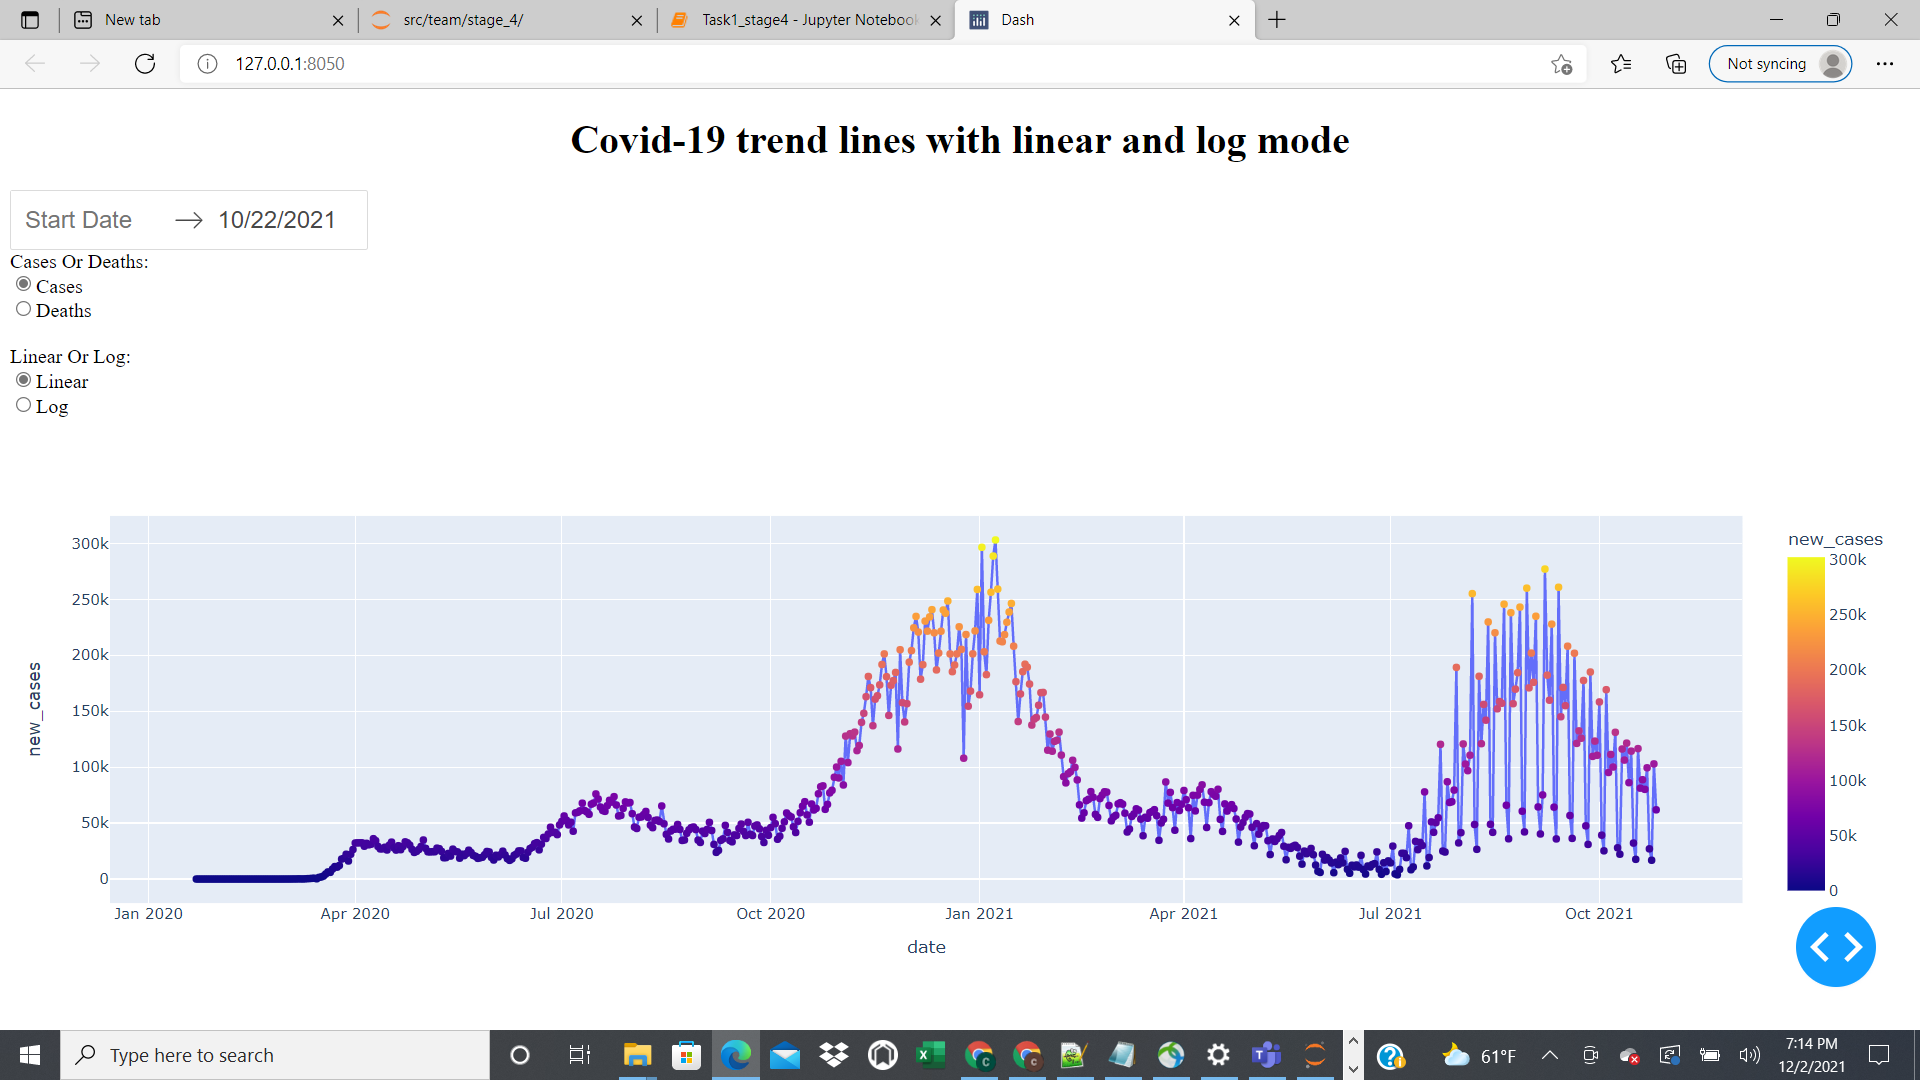

In [14]:
PATH = "../../../data/stage_4/pic_1.png"
Image(filename = PATH, width=1000, height=1100)

In [15]:
app.layout = html.Div([
    html.H1("Covid-19 trend line with linear and non linear regression ",style={'text-align':'center'}),
    dcc.DatePickerRange(
        id='my-date-picker-range',
        min_date_allowed=date(2020, 1, 22),
        max_date_allowed=date(2021, 12, 30),
        initial_visible_month=date(2020, 1, 22),
        end_date=date(2021, 10, 22)
    ),
    html.Br(),
    html.Div([
            html.Label("Cases Or Deaths:"),
            dcc.RadioItems(id="COrD",
                options=[
                    {"label": "Cases", "value": "cases"},
                    {"label": "Deaths", "value": "deaths"}
                ],
                value="cases", labelStyle={"display":"block"})]),
    html.Br(),
    html.Div([
            html.Label("Linear Or Non-linear:"),
            dcc.RadioItems(id="LOrN",
                options=[
                    {"label": "Linear", "value": "Linear"},
                    {"label": "Non-Linear", "value": "Nonlinear"}
                ],
                value="Linear", labelStyle={"display":"block"})]),
    html.Br(),
    dcc.Graph(id='Trend_Graph')
])

@app.callback(
     Output(component_id='Trend_Graph',component_property='figure'),
     Input('my-date-picker-range','start_date'),
     Input('my-date-picker-range','end_date'),
     Input('COrD','value'),
     Input('LOrN','value'))
def update_output(start_date, end_date,CorD_value,LorN_value):
    if LorN_value=='Linear':
        if start_date is not None:
            dff=df.copy()
            dff=dff[(dff['date']>=start_date) & (dff['date']<=end_date)]
            if CorD_value=='cases':
                X = dff.Number_days_Day1.values.reshape(-1, 1)
                y=dff.new_cases
                model = LinearRegression()
                model.fit(X,y)
                x_range = np.linspace(X.min(), X.max(), 100)
                y_range = model.predict(x_range.reshape(-1, 1))
                fig = px.scatter(dff, x='Number_days_Day1', y='new_cases', opacity=0.65)
                fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Regression Fit'))
                return fig
            elif CorD_value=='deaths':            
                X = dff.Number_days_Day1.values.reshape(-1, 1)
                y=dff.new_deaths
                model = LinearRegression()
                model.fit(X,y)
                x_range = np.linspace(X.min(), X.max(), 100)
                y_range = model.predict(x_range.reshape(-1, 1))
                fig = px.scatter(dff, x='Number_days_Day1', y='new_deaths',color='new_deaths', opacity=0.65)
                fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Regression Fit'))
                return fig

        else:
            dff=df.copy()
            if CorD_value=='cases':              
                X = dff.Number_days_Day1.values.reshape(-1, 1)
                y=dff.new_cases
                model = LinearRegression()
                model.fit(X,y)
                x_range = np.linspace(X.min(), X.max(), 100)
                y_range = model.predict(x_range.reshape(-1, 1))
                fig = px.scatter(dff, x='Number_days_Day1', y='new_cases',color='new_cases', opacity=0.65)
                fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Regression Fit'))
                return fig
            elif CorD_value=='deaths':
                X = dff.Number_days_Day1.values.reshape(-1, 1)
                y=dff.new_deaths
                model = LinearRegression()
                model.fit(X,y)
                x_range = np.linspace(X.min(), X.max(), 100)
                y_range = model.predict(x_range.reshape(-1, 1))
                fig = px.scatter(dff, x='Number_days_Day1', y='new_deaths',color='new_deaths', opacity=0.65)
                fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Regression Fit'))
                return fig
    elif LorN_value=='Nonlinear':
        if start_date is not None:
            dff=df.copy()
            dff=dff[(dff['date']>=start_date) & (dff['date']<=end_date)]
            if CorD_value=='cases':
                def format_coefs(coefs):
                    equation_list = [f"{coef}x^{i}" for i, coef in enumerate(coefs)]
                    equation = "$" +  " + ".join(equation_list) + "$"

                    replace_map = {"x^0": "", "x^1": "x", '+ -': '- '}
                    for old, new in replace_map.items():
                        equation = equation.replace(old, new)

                    return equation
                X = dff.Number_days_Day1.values.reshape(-1, 1)
                y=dff.new_cases
                x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
                x_range_pred=x_new.Number_days_Day1.values.reshape(-1,1)
                fig = px.scatter(dff, x='Number_days_Day1', y='new_cases',color='new_cases', opacity=0.65)
                for degree in [4]:
                    poly = PolynomialFeatures(degree)
                    poly.fit(X)
                    X_poly = poly.transform(X)
                    x_range_poly = poly.transform(x_range)
                    model = LinearRegression(fit_intercept=False)
                    model.fit(X_poly,y )
                    y_poly = model.predict(x_range_poly)
                    equation = format_coefs(model.coef_.round(2))
                    fig.add_traces(go.Scatter(x=x_range.squeeze(), y=y_poly, name=equation))
                    return fig
            elif CorD_value=='deaths':
                def format_coefs(coefs):
                    equation_list = [f"{coef}x^{i}" for i, coef in enumerate(coefs)]
                    equation = "$" +  " + ".join(equation_list) + "$"

                    replace_map = {"x^0": "", "x^1": "x", '+ -': '- '}
                    for old, new in replace_map.items():
                        equation = equation.replace(old, new)

                    return equation
                X = dff.Number_days_Day1.values.reshape(-1, 1)
                y=dff.new_deaths
                x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
                x_range_pred=x_new.Number_days_Day1.values.reshape(-1,1)
                fig = px.scatter(dff, x='Number_days_Day1', y='new_deaths',color='new_deaths', opacity=0.65)
                for degree in [4]:
                    poly = PolynomialFeatures(degree)
                    poly.fit(X)
                    X_poly = poly.transform(X)
                    x_range_poly = poly.transform(x_range)

                    model = LinearRegression(fit_intercept=False)
                    model.fit(X_poly,y )
                    y_poly = model.predict(x_range_poly)

                    equation = format_coefs(model.coef_.round(2))
                    fig.add_traces(go.Scatter(x=x_range.squeeze(), y=y_poly, name=equation))
                return fig

        else:
            dff=df.copy()
            if CorD_value=='cases':              
                def format_coefs(coefs):
                    equation_list = [f"{coef}x^{i}" for i, coef in enumerate(coefs)]
                    equation = "$" +  " + ".join(equation_list) + "$"

                    replace_map = {"x^0": "", "x^1": "x", '+ -': '- '}
                    for old, new in replace_map.items():
                        equation = equation.replace(old, new)

                    return equation
                X = dff.Number_days_Day1.values.reshape(-1, 1)
                y=dff.new_cases
                x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
                fig = px.scatter(dff, x='Number_days_Day1', y='new_cases',color='new_cases', opacity=0.65)
                for degree in [4]:
                    poly = PolynomialFeatures(degree)
                    poly.fit(X)
                    X_poly = poly.transform(X)
                    x_range_poly = poly.transform(x_range)

                    model = LinearRegression(fit_intercept=False)
                    model.fit(X_poly,y )
                    y_poly = model.predict(x_range_poly)

                    equation = format_coefs(model.coef_.round(2))
                    fig.add_traces(go.Scatter(x=x_range.squeeze(), y=y_poly, name=equation))
                return fig
            elif CorD_value=='deaths':
                def format_coefs(coefs):
                    equation_list = [f"{coef}x^{i}" for i, coef in enumerate(coefs)]
                    equation = "$" +  " + ".join(equation_list) + "$"

                    replace_map = {"x^0": "", "x^1": "x", '+ -': '- '}
                    for old, new in replace_map.items():
                        equation = equation.replace(old, new)

                    return equation
                X = dff.Number_days_Day1.values.reshape(-1, 1)
                y=dff.new_deaths
                x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
                fig = px.scatter(dff, x='Number_days_Day1', y='new_deaths',color='new_deaths', opacity=0.65)
                for degree in [4]:
                    poly = PolynomialFeatures(degree)
                    poly.fit(X)
                    X_poly = poly.transform(X)
                    x_range_poly = poly.transform(x_range)
                    model = LinearRegression(fit_intercept=False)
                    model.fit(X_poly,y )
                    y_poly = model.predict(x_range_poly)

                    equation = format_coefs(model.coef_.round(2))
                    fig.add_traces(go.Scatter(x=x_range.squeeze(), y=y_poly, name=equation))
                return fig
if __name__ == '__main__':
    app.run_server(mode='inline')
    #app.run_server(debug=True)

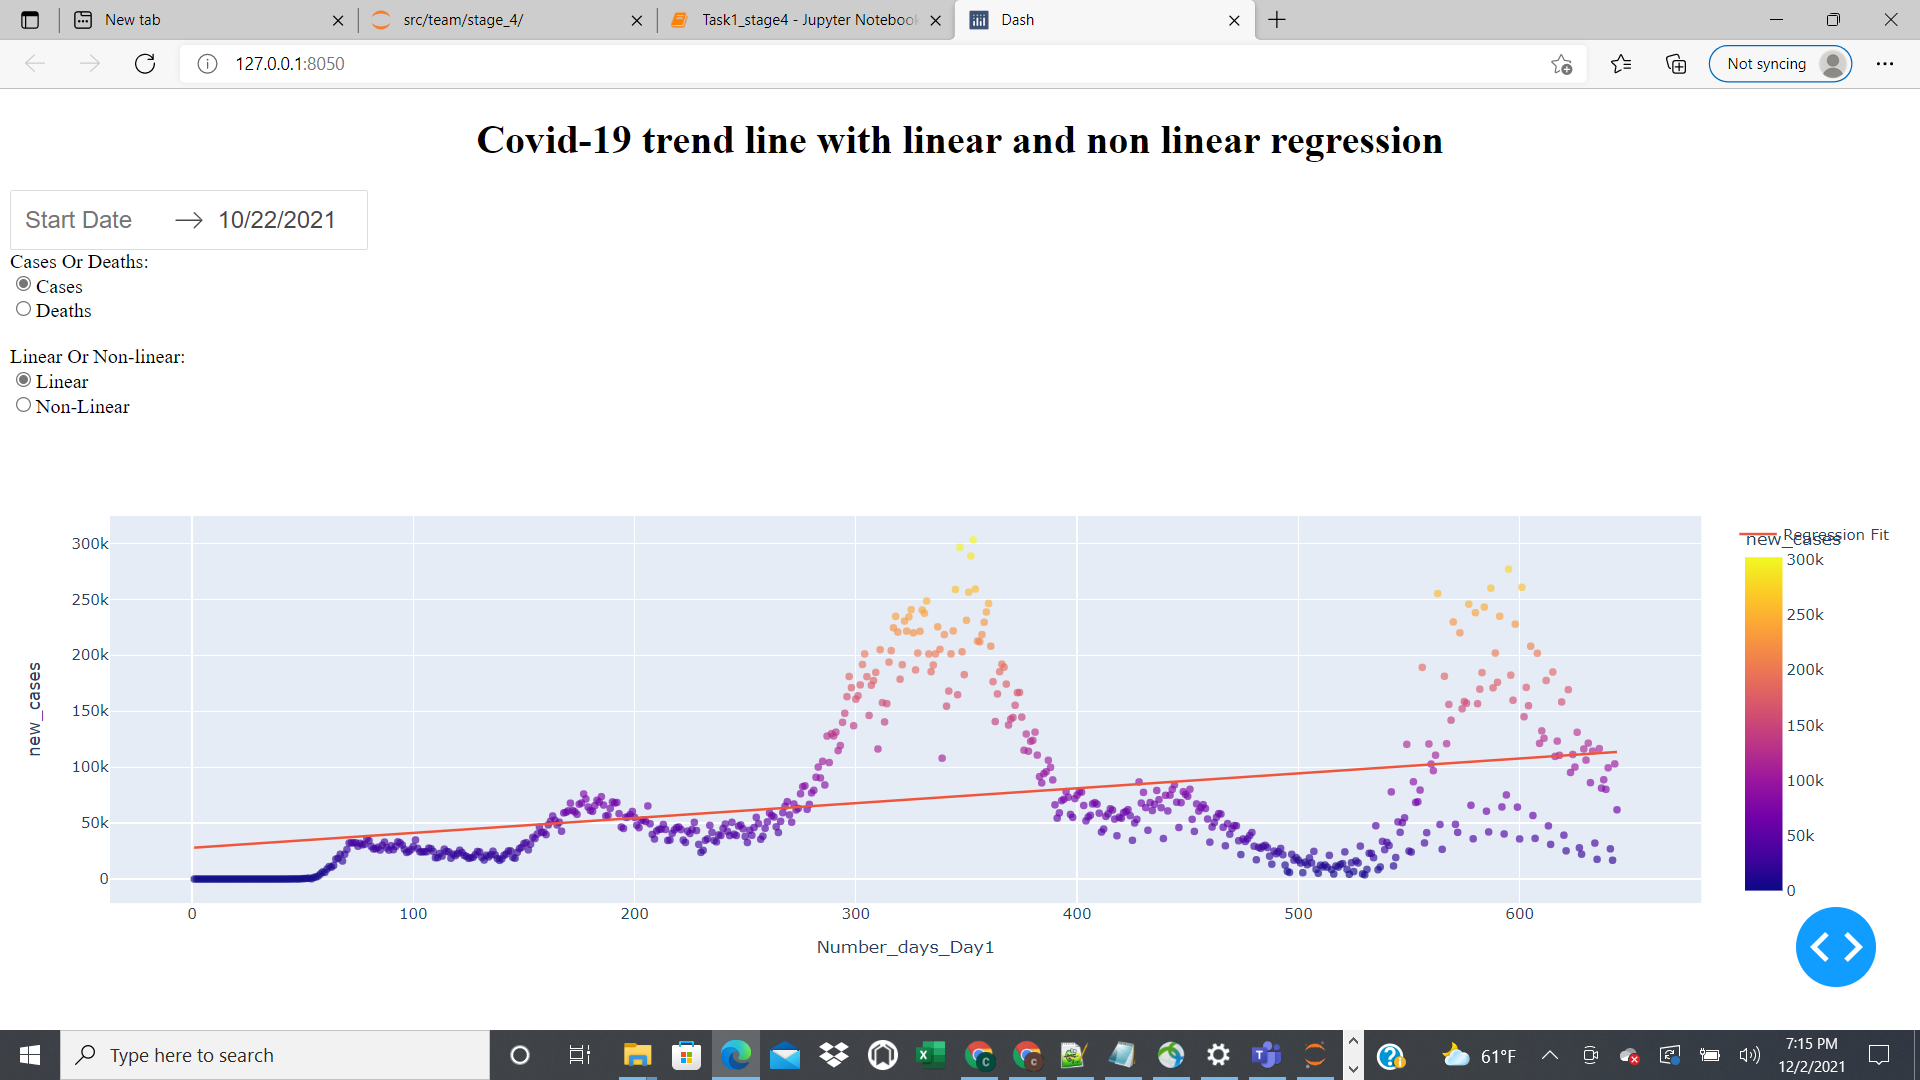

In [16]:
PATH = "../../../data/stage_4/pic_2.png"
Image(filename = PATH, width=1000, height=1100)

In [17]:
app.layout = html.Div([
    html.H1("Moving averages for USA",style={'text-align':'center'}),
    html.Div([
            html.Label("Cases Or Deaths:"),
            dcc.RadioItems(id="COrD",
                options=[
                    {"label": "Cases", "value": "cases"},
                    {"label": "Deaths", "value": "deaths"}
                ],
                value="cases", labelStyle={"display":"block"})]),
    html.Br(),
    dcc.Slider(
        id='my-slider',
        min=1,
        max=20,
        step=1,
        value=7,
    ),
    
    html.Br(),
    dcc.Graph(id='Rolling_Average')
])

@app.callback(
     Output(component_id='Rolling_Average',component_property='figure'),
     Input('COrD','value'),
     Input('my-slider','value')
)
def rolling_average(CorD_value,myslider_value):
    if CorD_value=='cases':
        df_m=df.copy
        fig_m = px.scatter(df, x="date", y="new_cases", trendline="rolling",color='new_cases', trendline_options=dict(window=myslider_value),
                title=str(myslider_value)+"-day moving average")
        return fig_m
    elif CorD_value=='deaths':
        df_m=df.copy
        fig_m = px.scatter(df, x="date", y="new_deaths", trendline="rolling",color='new_deaths', trendline_options=dict(window=myslider_value),
                title=str(myslider_value)+"-day moving average")
        return fig_m
if __name__ == '__main__':
    app.run_server(mode='inline')
    #app.run_server(debug=True)

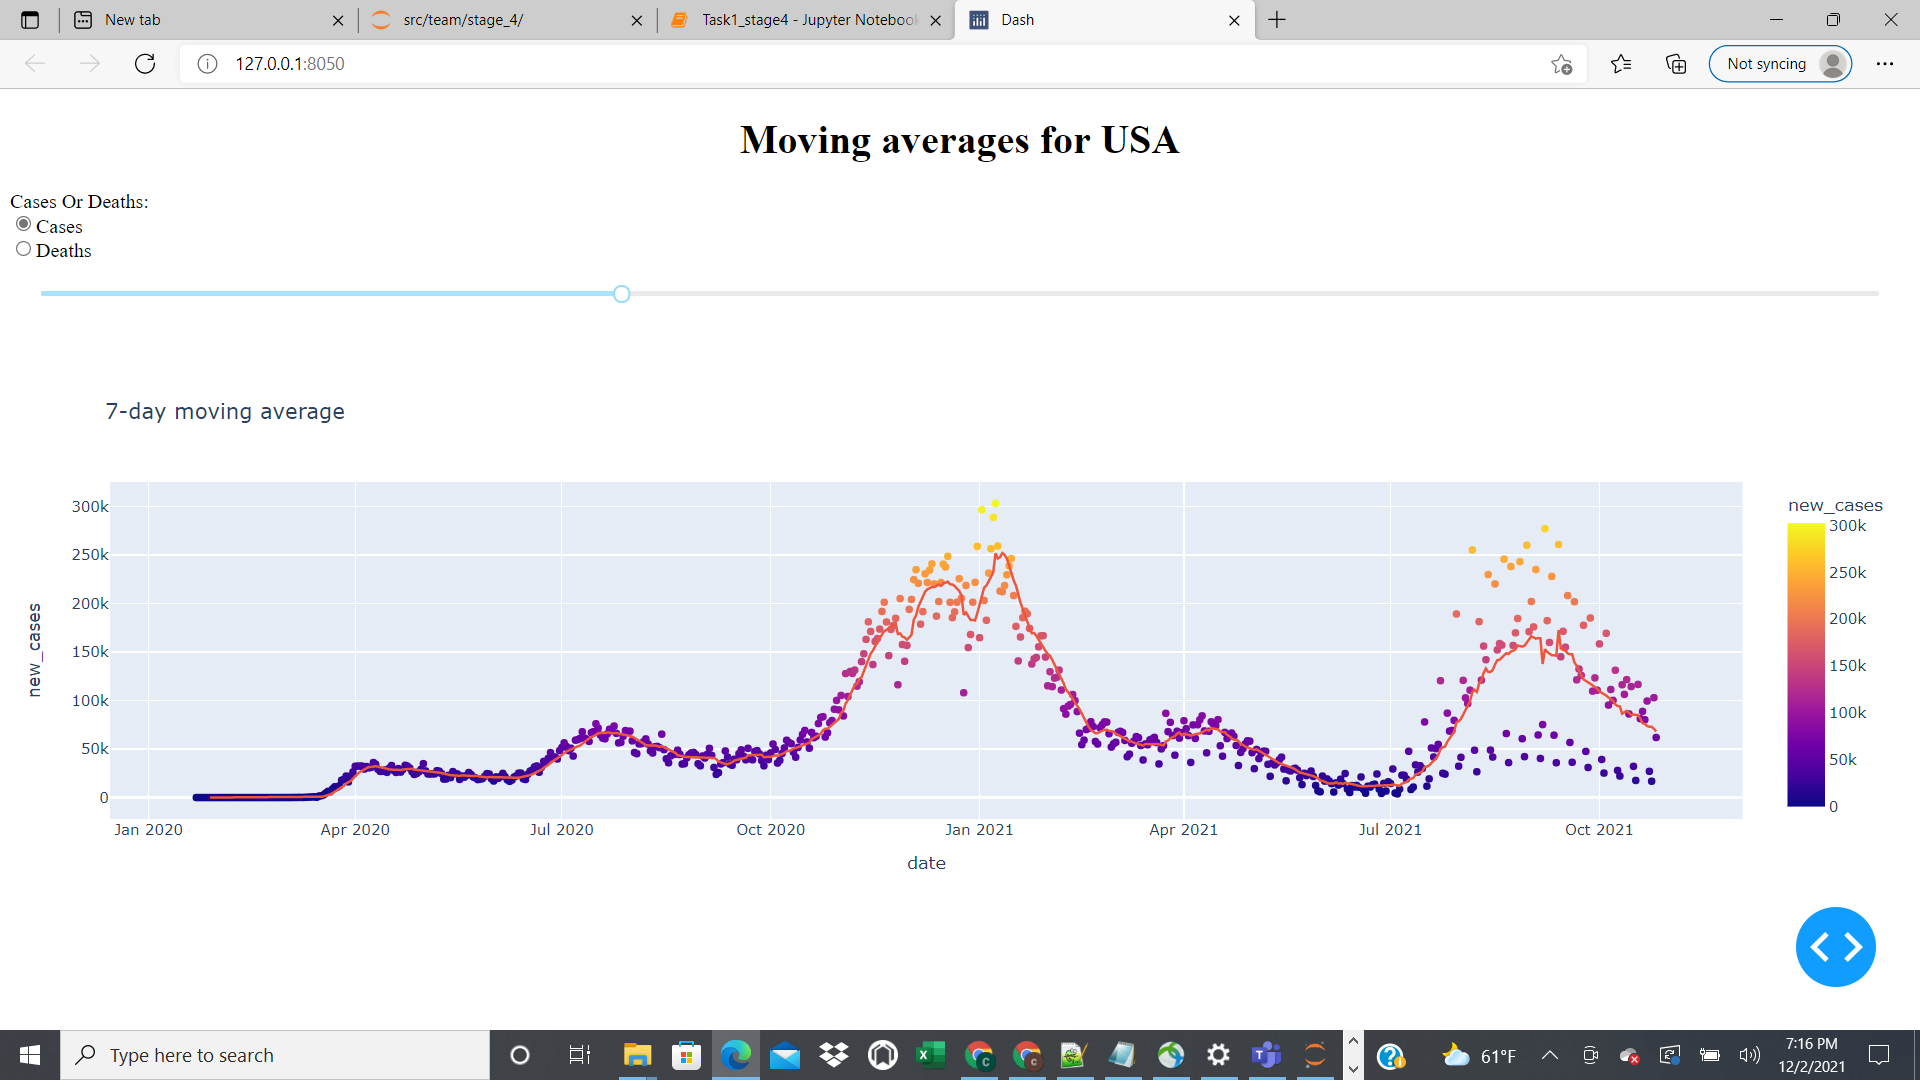

In [18]:
PATH = "../../../data/stage_4/pic_3.png"
Image(filename = PATH, width=1000, height=1100)